In [30]:
#importing the required libraries for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#importing the dataset for the project
df=pd.read_csv('heart.csv')

In [6]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Data Pre-processing


In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Information of the Datasets

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Exploratory Data Analysis


In [17]:
#no. of datapoints and no.of features 
df.shape

(1025, 14)

In [18]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [20]:
#No. of unique values of each fetaure in the dataset
features = df.columns
for feature in features:
     print(f'{feature}--->{df[feature].nunique()}')

age--->41
sex--->2
cp--->4
trestbps--->49
chol--->152
fbs--->2
restecg--->3
thalach--->91
exang--->2
oldpeak--->40
slope--->3
ca--->5
thal--->4
target--->2


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Visualization

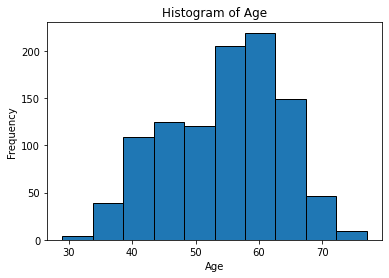

In [22]:
age = df['age']
# Plotting the histogram
plt.hist(age, bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

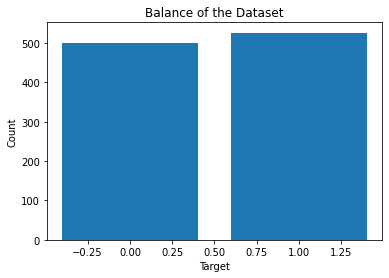

In [29]:
target_counts = df['target'].value_counts()
# Plotting the balance
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Balance of the Dataset')
plt.show()

#looking at the histogram of the target it can be concluded that the dataset is nearly balanced

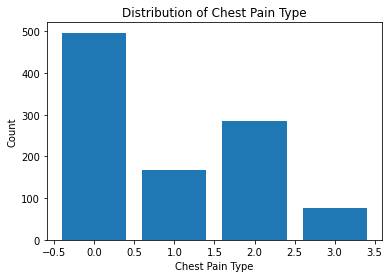

In [36]:
cp_counts = df['cp'].value_counts()
# Plotting the distribution of 'cp'
plt.bar(cp_counts.index, cp_counts.values)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Type')
plt.show()

Defining Correlation between the columns in the dataset 

<AxesSubplot:>

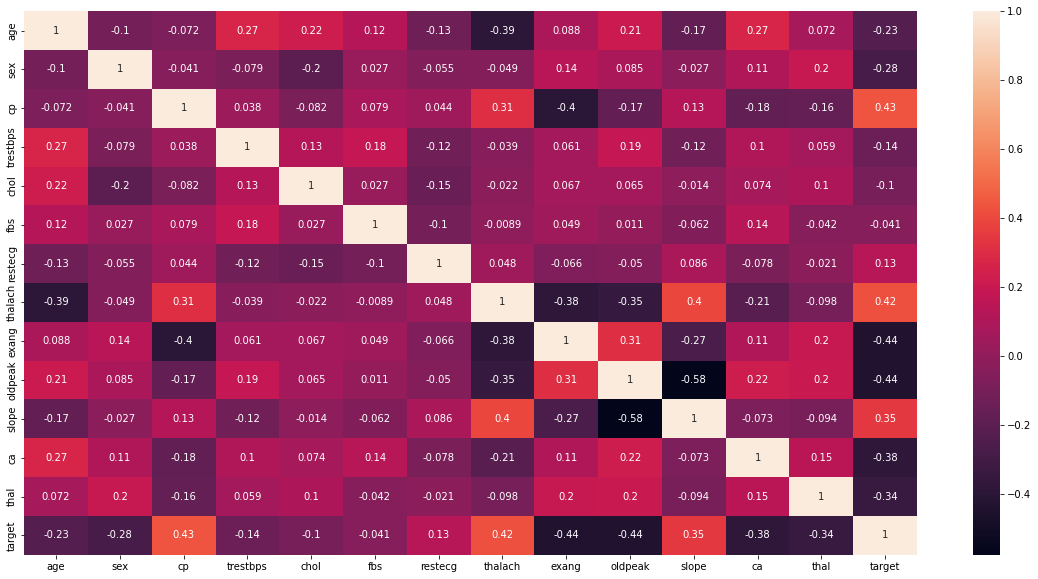

In [37]:
data  = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data, annot = True)

# Data Model Building

In [39]:
#Dropping the column target column that we need to predict and set as a dependent variable
X=df.drop('target', axis='columns')
y=df['target']

In [41]:
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [42]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=5)

Importing Models

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [81]:
model = SVC(kernel='linear', random_state=42, probability=True)
model.fit(X_train, y_train)

training_accuracy = model1.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)

predictions = model1.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)

print("Classification Report")
report = classification_report(y_test, predictions)
print(report)

y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

Training Accuracy: 0.8414634146341463
Test Accuracy: 0.848780487804878
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.76      0.83       103
           1       0.79      0.94      0.86       102

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205

ROC-AUC Score: 0.9224728726442033


In [82]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train , y_train)

training_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)

predictions = model2.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)
report = classification_report(y_test, predictions)
print(report)

y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

Training Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       102

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

ROC-AUC Score: 1.0


In [83]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train , y_train)

training_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)

predictions = model2.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)
report = classification_report(y_test, predictions)
print(report)

y_proba = model.predict_proba(X_test)[:, 1]  
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

Training Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       102

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

ROC-AUC Score: 1.0
